# Test Examples and Visualization

This document will show the test data and visualization platform in PySDKit.

When developing PySDKit, we set up a large number of test examples to test the performance of the signal decomposition algorithm.
All functions related to data generation and test examples are stored in the `data` directory, mainly including the following types of functions:
- Function `add_noise` to add a specified noise size to a one-dimensional signal.
- Generate various signals in different forms such as sine `generate_sin_signal`, square wave `generate_square_wave` and triangle wave `generate_triangle_wave`, etc.
- Functions `test_univariate_signal` and `test_multivariate_signal` to generate univariate and multivariate signal decomposition test samples.
- Functions `test_univariate_image` and `test_multivariate_image` to generate single-channel and multi-channel two-dimensional image test samples.
- Functions `test_univariate_cube` and `test_multivariate_cube` to generate single-channel and multi-channel three-dimensional cubes.

At the same time, we also provide a very complete visualization platform stored in the `plot` directory for better observation of signal features, mainly including:
- Functions `plot_signal` and `plot_images` for visualizing one-dimensional signals and two-dimensional images in the spatial and frequency domains.
- Comprehensive function `plot_IMFs` for visualizing signal decomposition results.

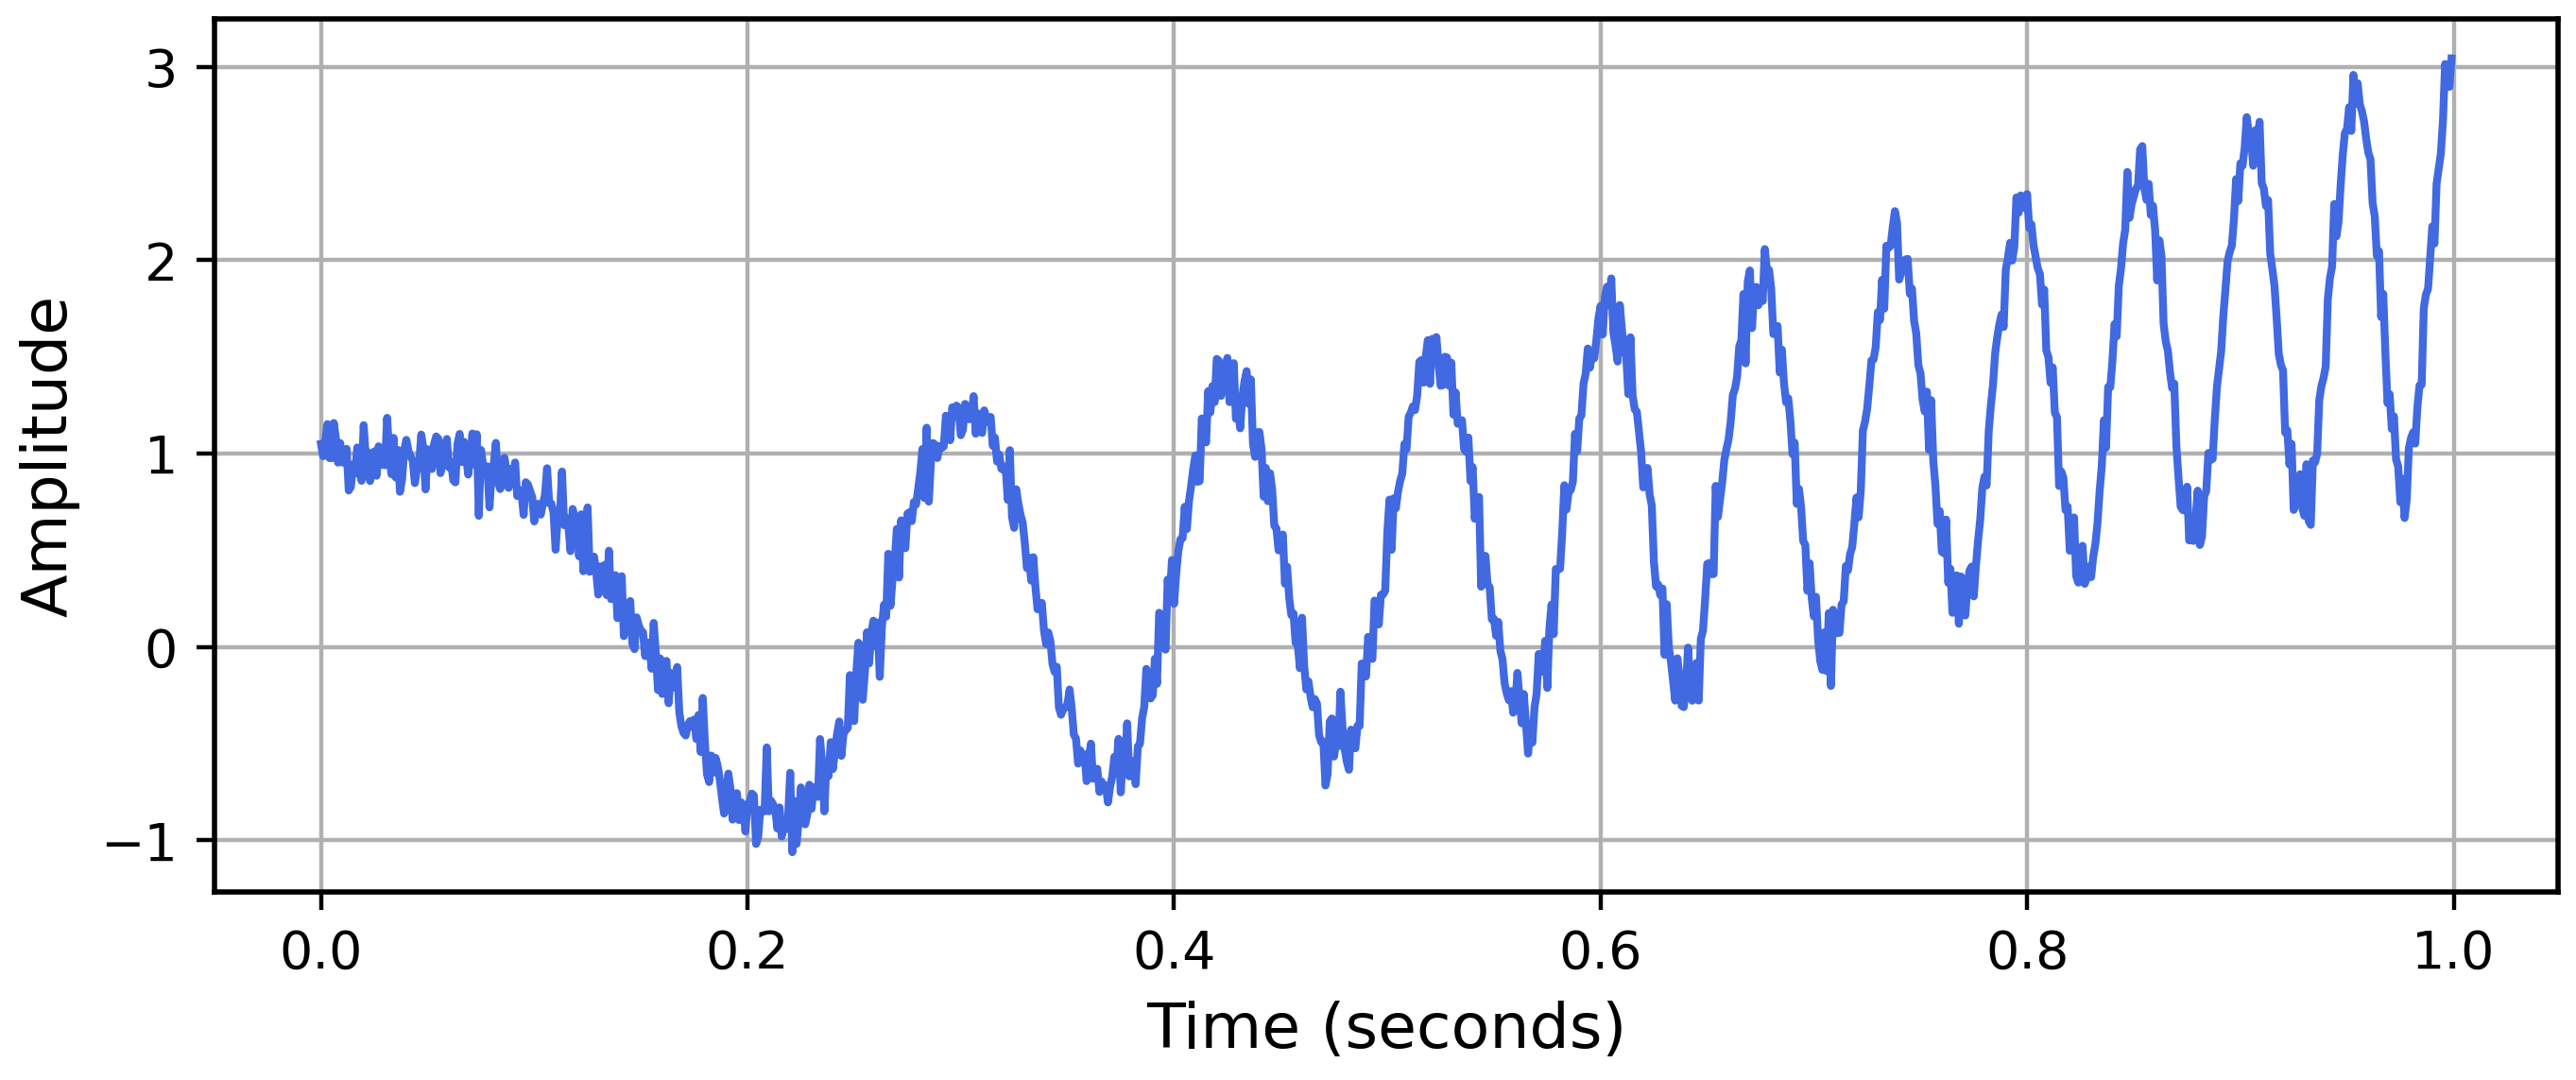

In [12]:
# Import related functions for data generation and visualization
from pysdkit.data import test_emd, test_univariate_signal, test_multivariate_signal
from pysdkit.plot import plot_signal, plot_IMFs

# Create a simple test case and visualize it
time, signal = test_emd()
fig = plot_signal(time, signal)

Next, we will use the `test_univariate_signal` function to generate a test case for the specified univariate signal decomposition.

This function contains three parameters `case`, `duration` and `sampling_rate`, which represent the selected test case number, the time domain range of the generated signal, and the number of sampling points in the specified range, respectively.

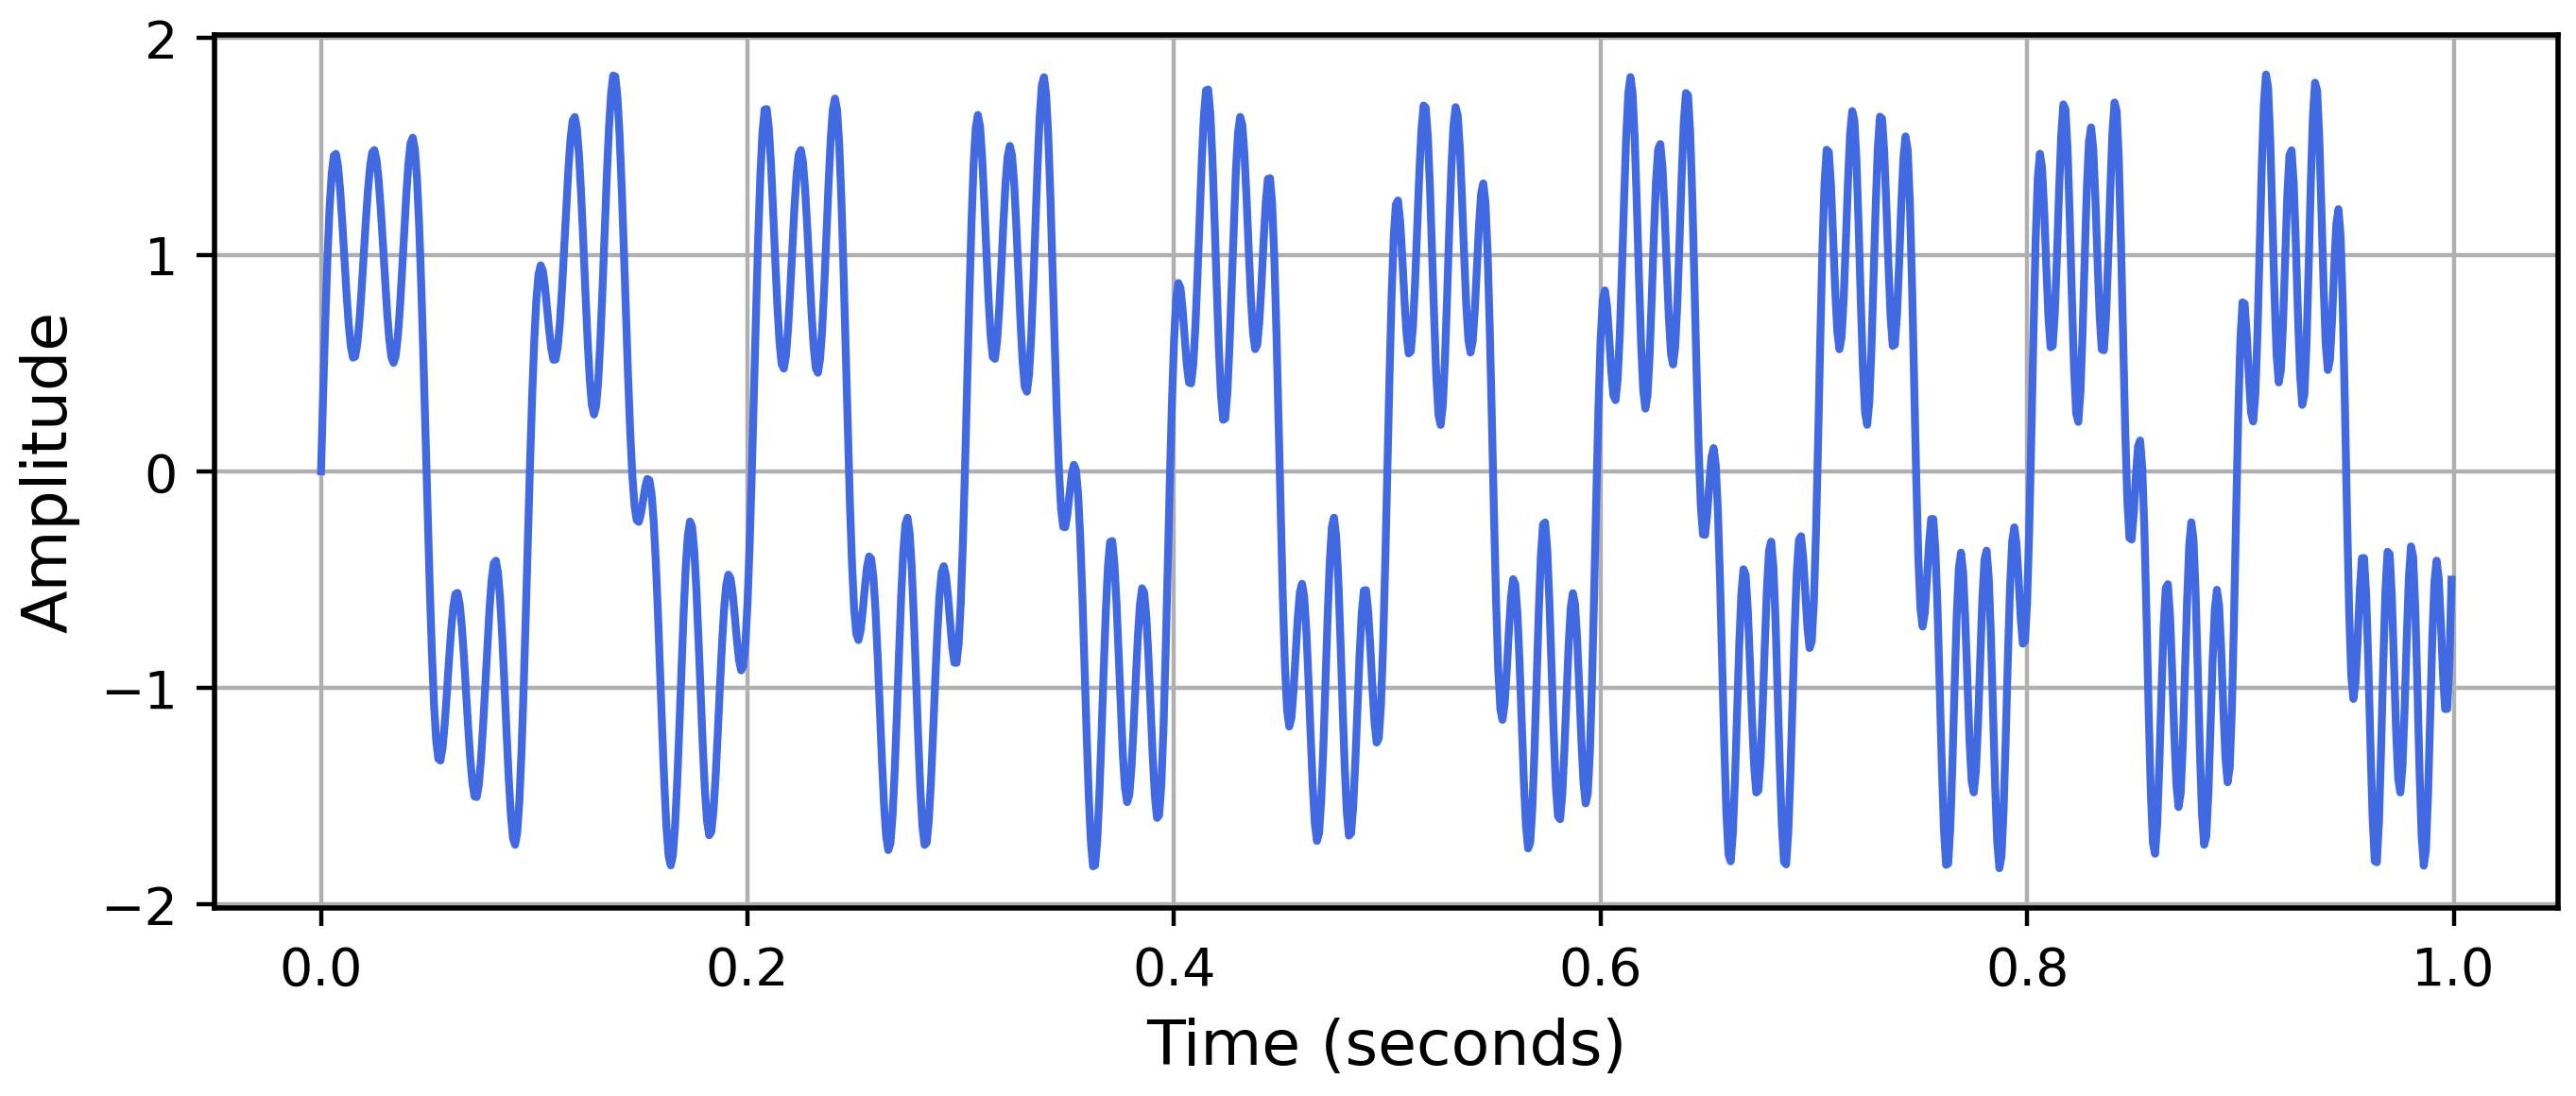

In [13]:
# The default test number of this function is 1.
# We generate a function with 1000 sampling points in the range of 0 to 1.
time, signal = test_univariate_signal(duration=1, sampling_rate=1000)
fig = plot_signal(time=time, signal=signal)

We can choose another test case.

At the same time, the signal visualization function we provide can not only visualize the signal in the time domain, but also plot its frequency domain characteristics at the same time.

Just set it by passing the parameter `spectrum`.

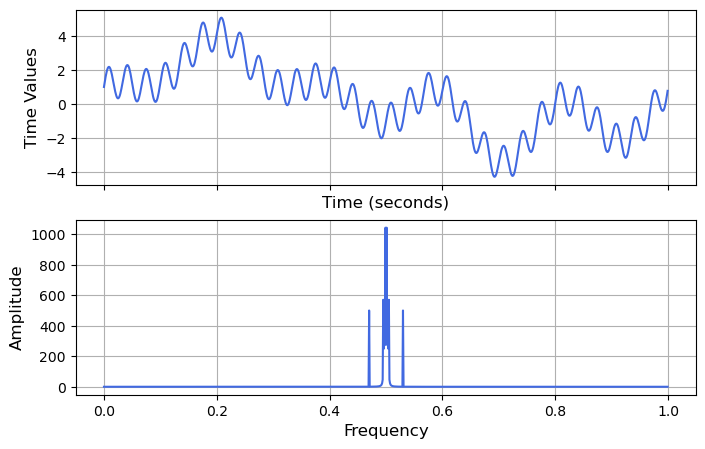

In [3]:
# Here we switch the number of the test samples and visualize their frequency domain characteristics.
time, signal = test_univariate_signal(case=2)
fig = plot_signal(time, signal, spectrum=True)

In addition to univariate signals, PySDKit also provides a multivariate signal generation interface `test_multivariate_signal`.

This interface can generate signals of multiple channels, and also has three parameters: `case`, `duration` and `sampling_rate`.

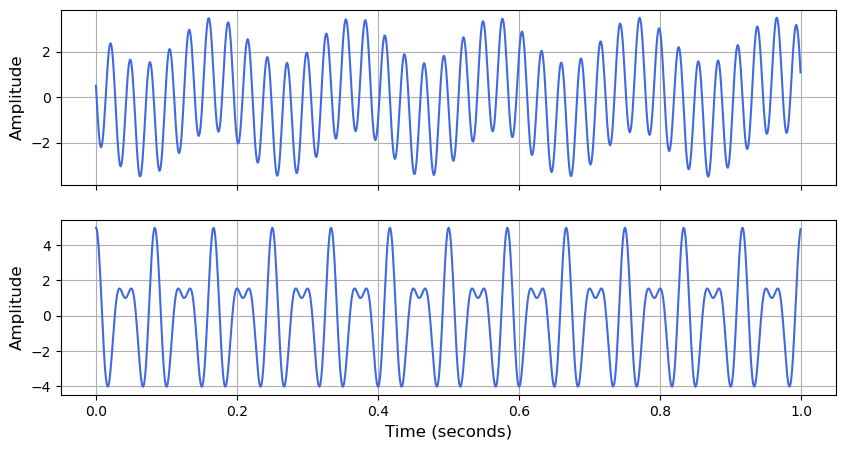

In [5]:
# Generate multivariate (multi-channel) signals
time, signal = test_multivariate_signal(case=1, duration=1, sampling_rate=1000)
fig = plot_signal(time, signal)

Like univariate signals, our multivariate signal generation function also provides multiple test examples.

Let's try test number 2

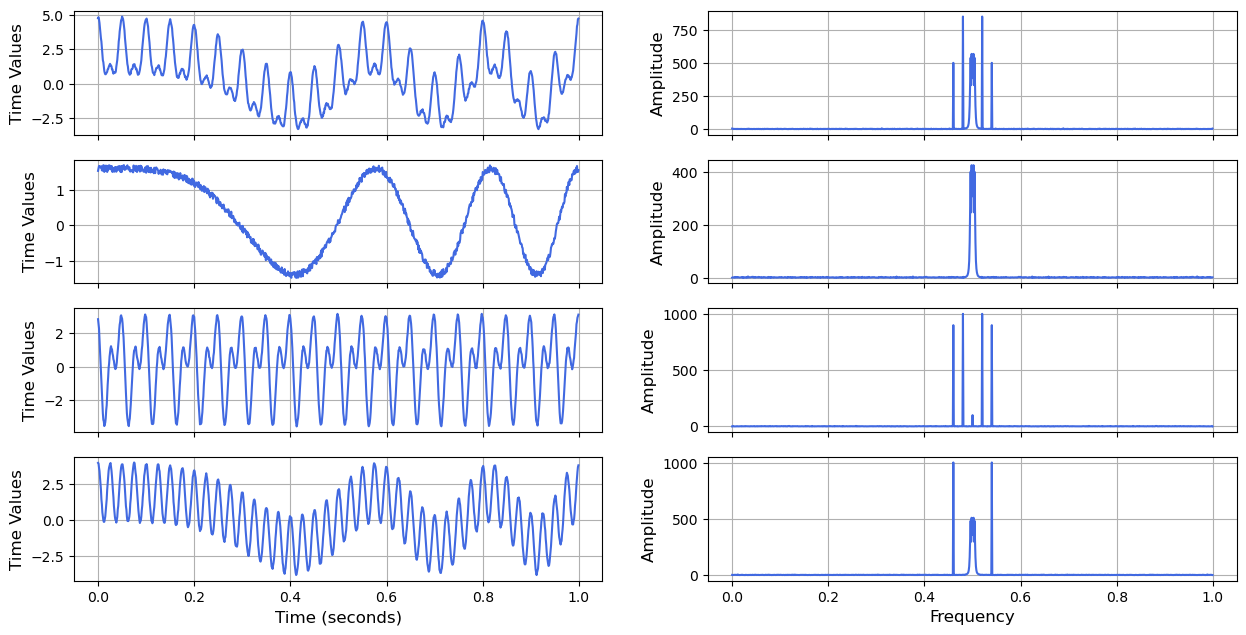

In [6]:
# Switch the number of test samples
time, signal = test_multivariate_signal(case=2)
fig = plot_signal(time, signal, spectrum=True)

With the above test examples and visualization methods, let's use this data to test our specific signal decomposition algorithm.

Let's first test the empirical mode decomposition (EMD) algorithm as an example.

We used the `Scikit-learn` style interface when developing PySDKit.

First, we need to create an algorithm instance and pass in the specified parameters.

Then we need to call the `fit_transform` method to input the signal for decomposition.

Finally, we use the visualization function `plot_IMFs` to visualize the decomposition results.

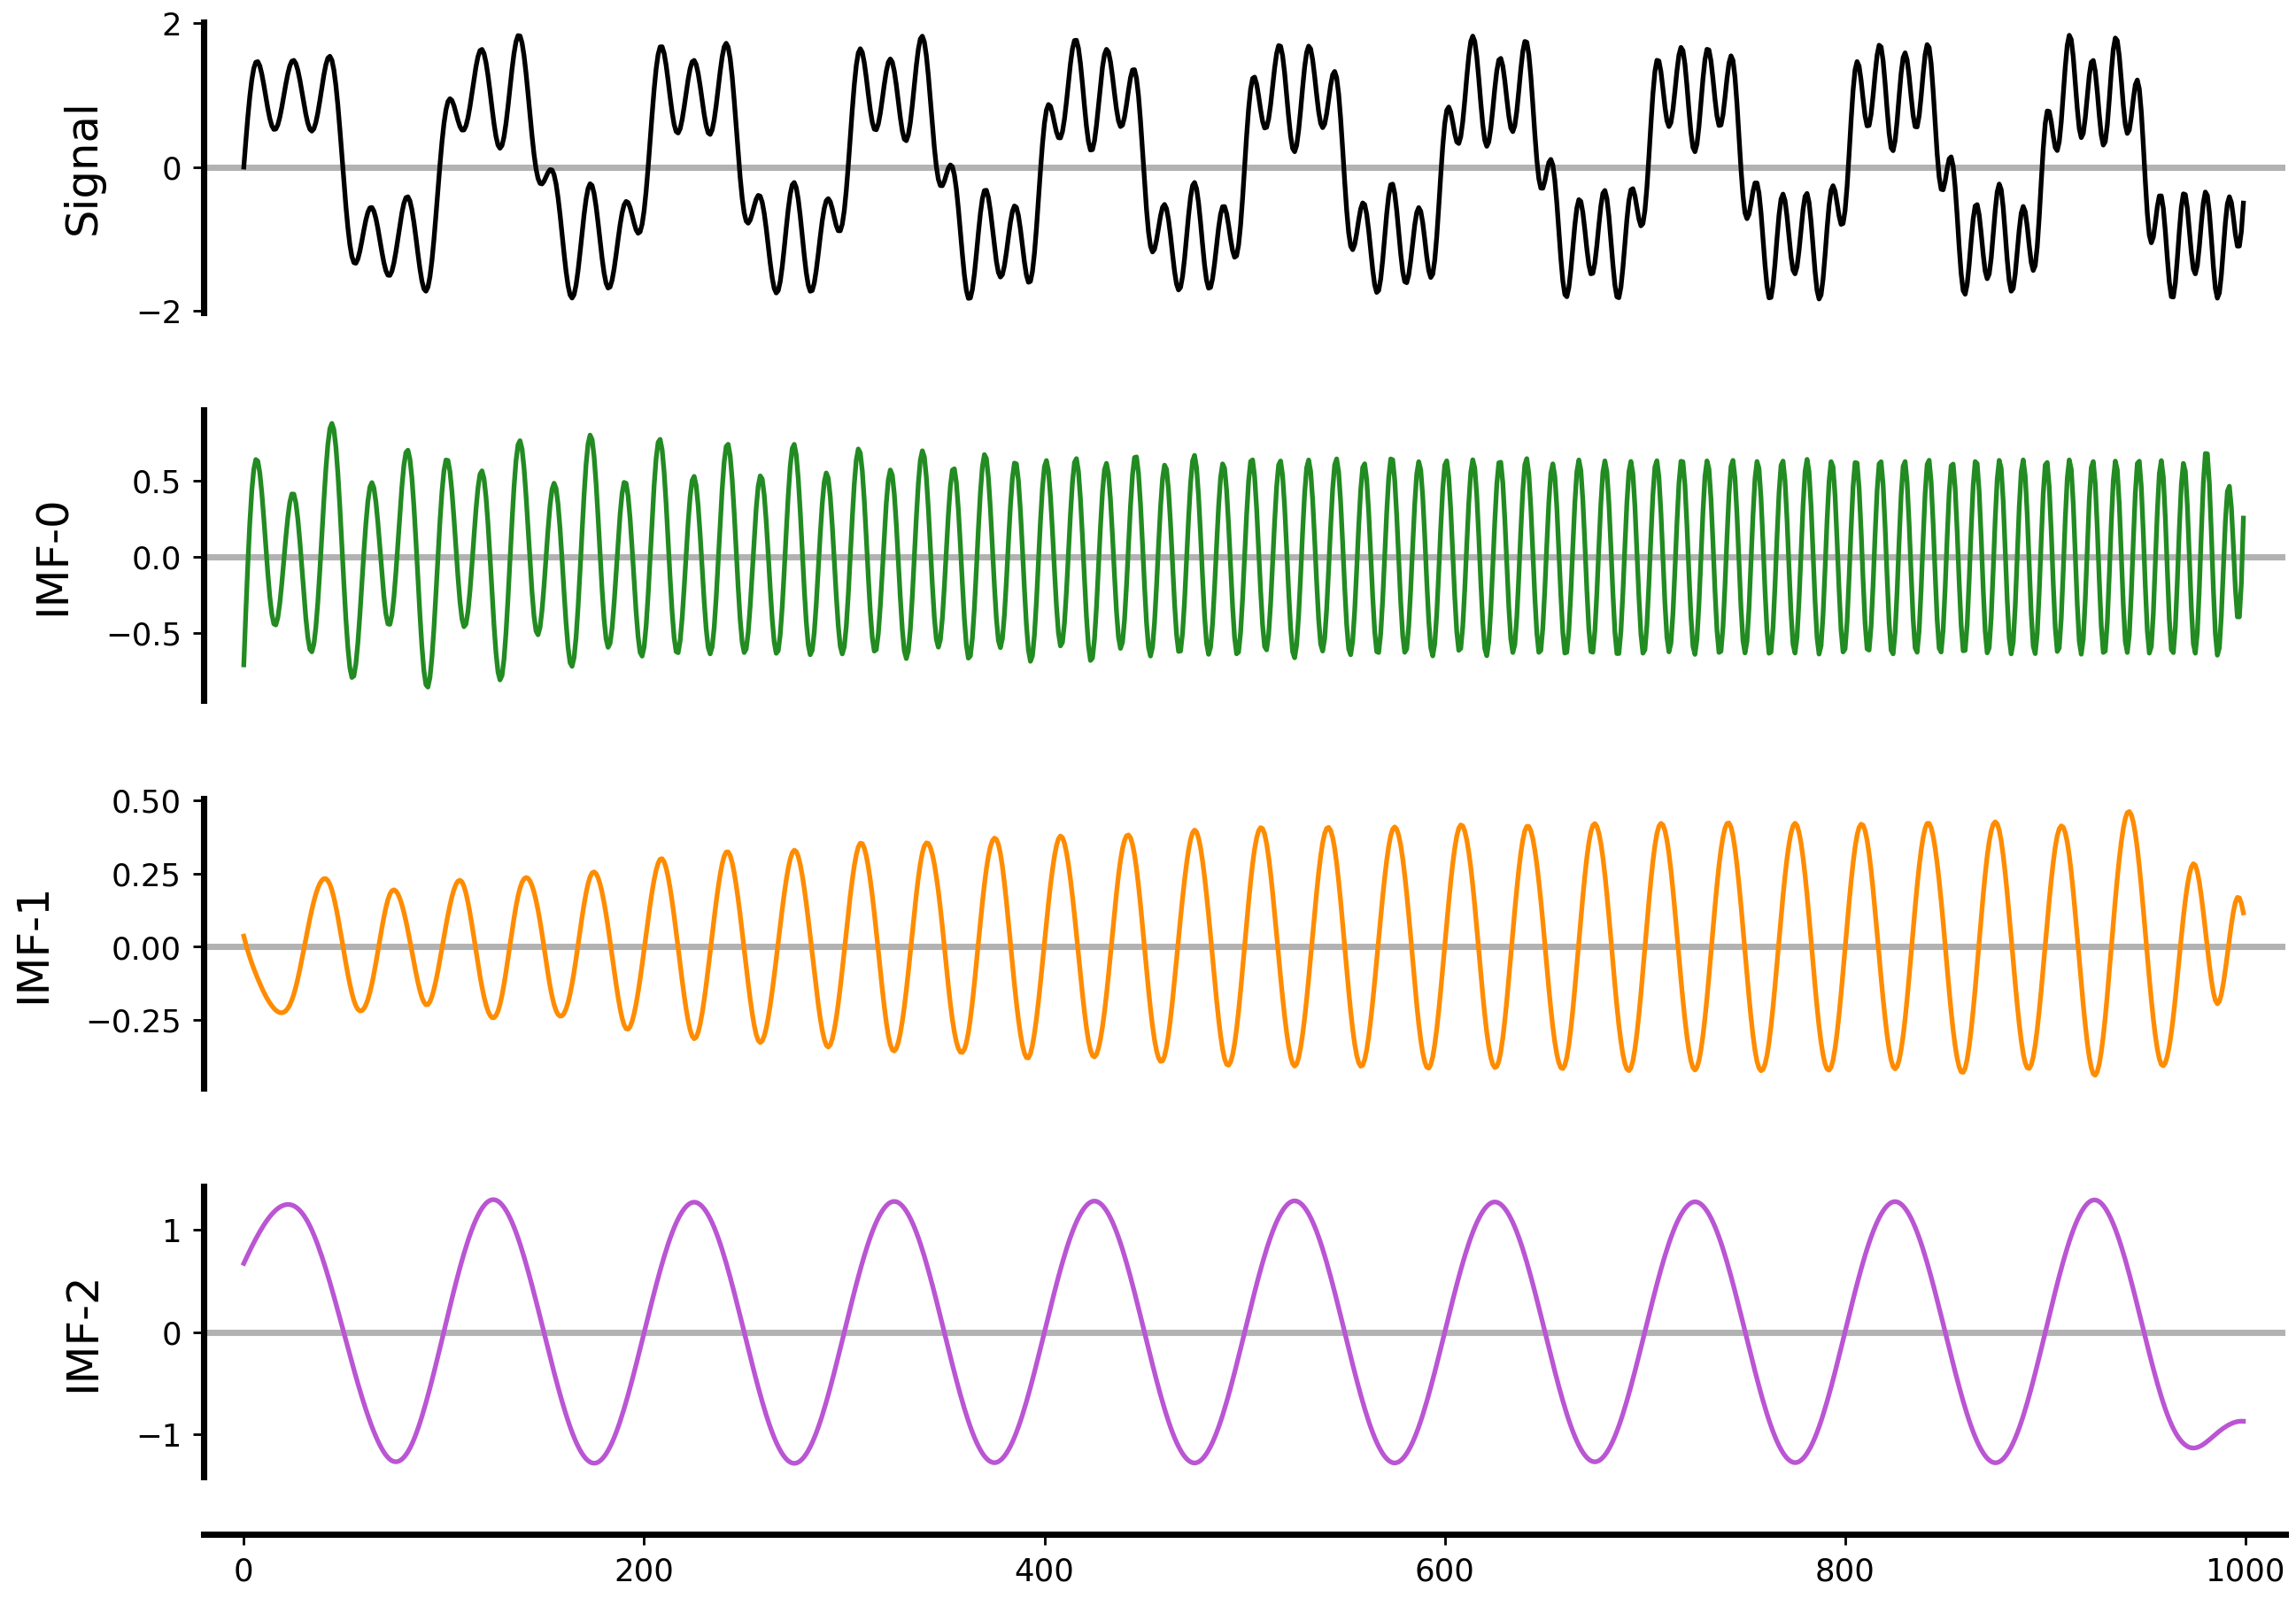

In [7]:
# Import the empirical mode decomposition algorithm
from pysdkit import EMD

# Get the signal to be decomposed
time, signal = test_univariate_signal()

# Create an algorithm instance
# Use the default parameters here
emd = EMD(max_imfs=3)

# Execute the signal decomposition algorithm
IMFs = emd.fit_transform(signal)

# Visualize the decomposition results
plot_IMFs(signal, IMFs)

The above method visualizes the results of signal decomposition on a two-dimensional plane.

This visualization method is very intuitive and can clearly observe the relationship between the original signal and the decomposed intrinsic mode function.

At the same time, PySDKit specifically sets up a method for visualization in three-dimensional space.

This method can better observe the quantitative relationship between several components.

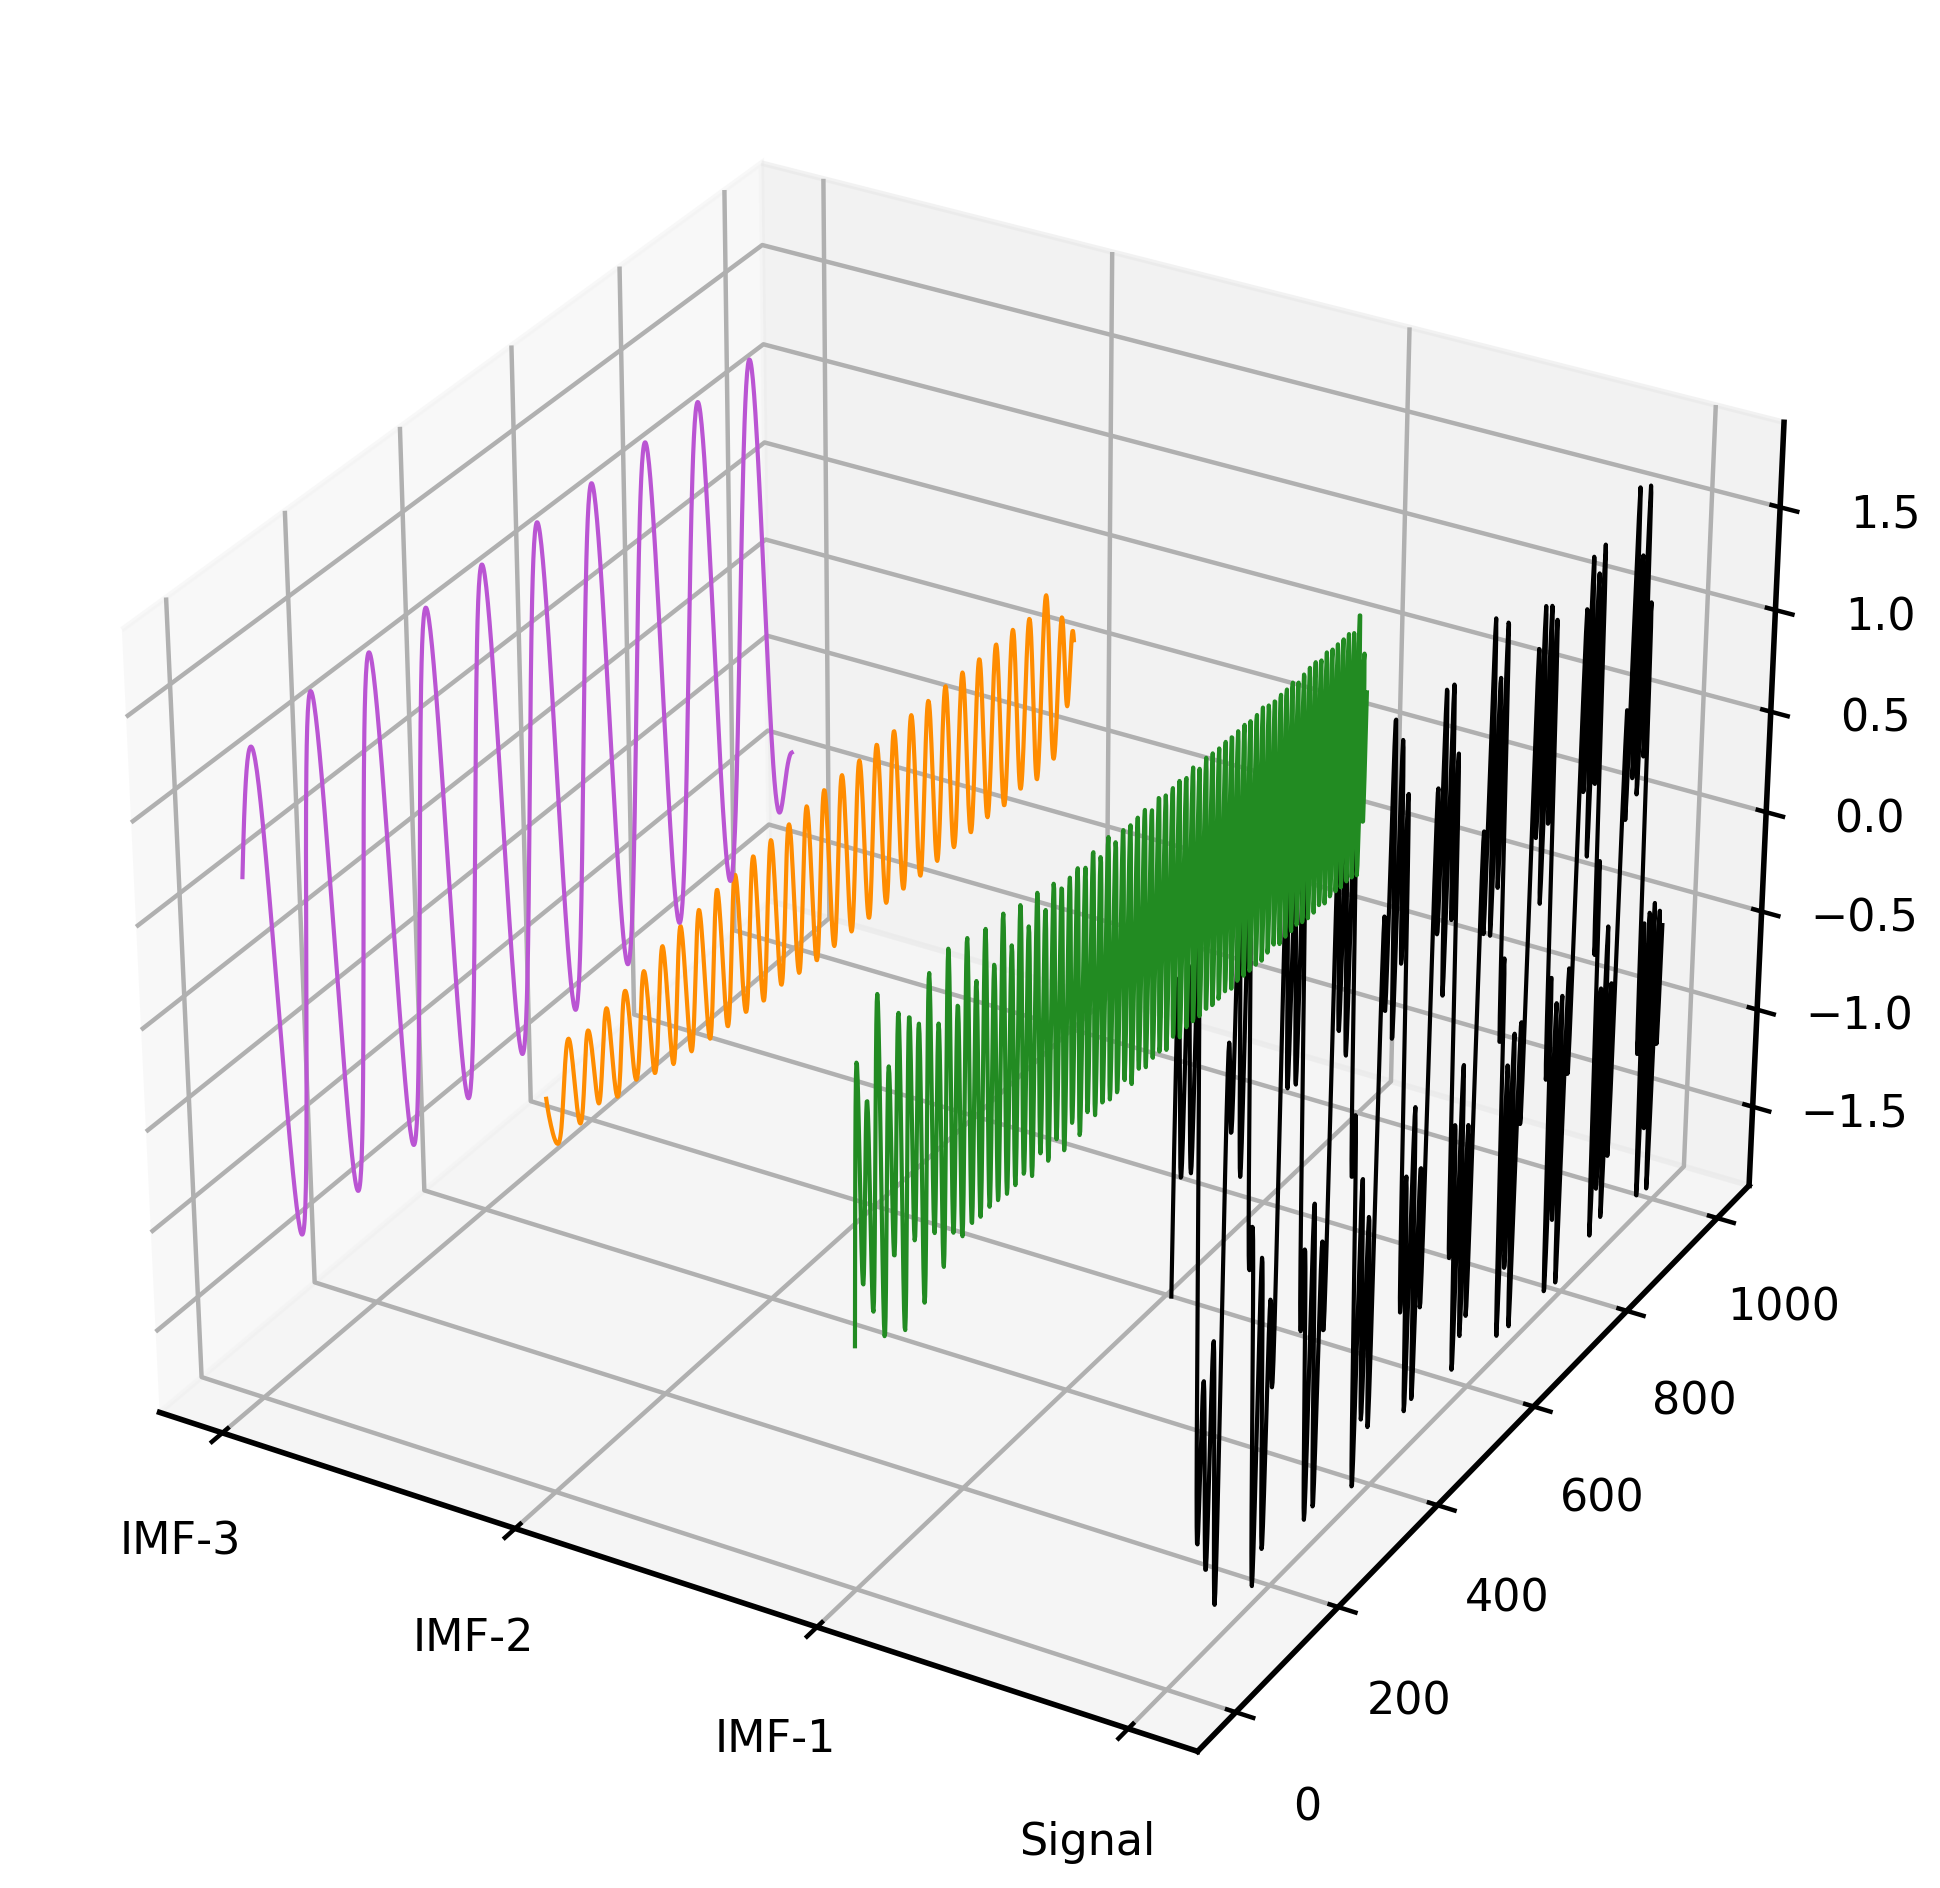

In [8]:
# Adjust the visualization method through the `view` variable
plot_IMFs(signal, IMFs, view='3d')

Next we will test the multivariate signal decomposition algorithm.

The steps and basic principles are the same as those of the univariate signal decomposition.

Our visualization function will automatically detect the dimension of the input signal to distinguish between univariate and multivariate signals.

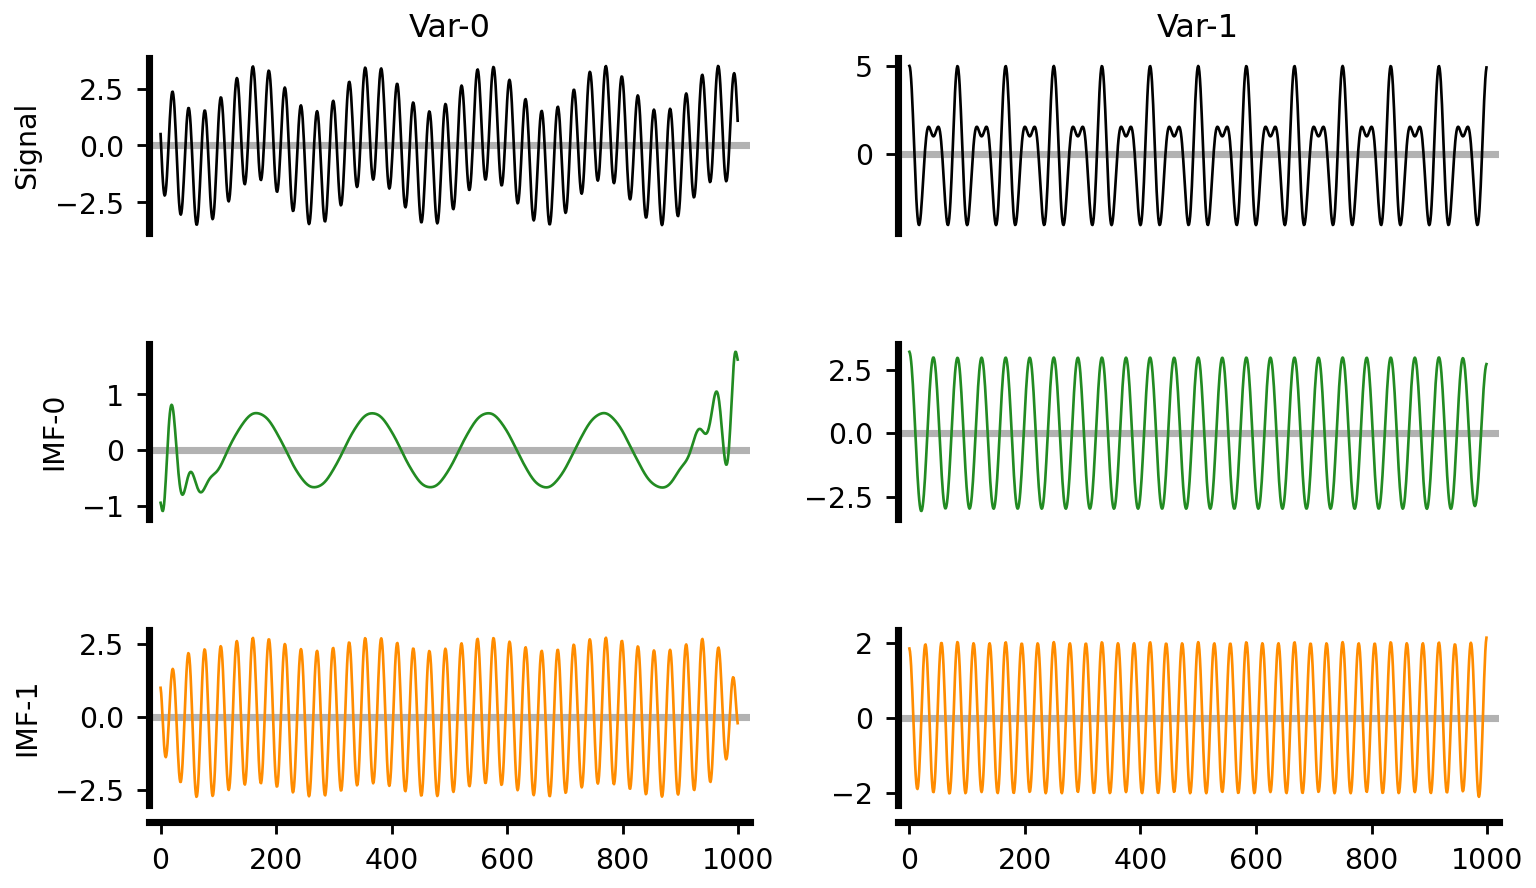

In [9]:
# Import multivariate signal decomposition algorithm
from pysdkit import MVMD

# Create a test signal
time, signal = test_multivariate_signal()

# Create an algorithm instance for multivariate signal decomposition and pass parameters
mvmd = MVMD(K=2, alpha=500, tau=0.0)

# Execute the signal decomposition algorithm
IMFs = mvmd.fit_transform(signal)

# Visualize the decomposition results
plot_IMFs(signal, IMFs)

We also have 3D visualization methods for multivariate signals.

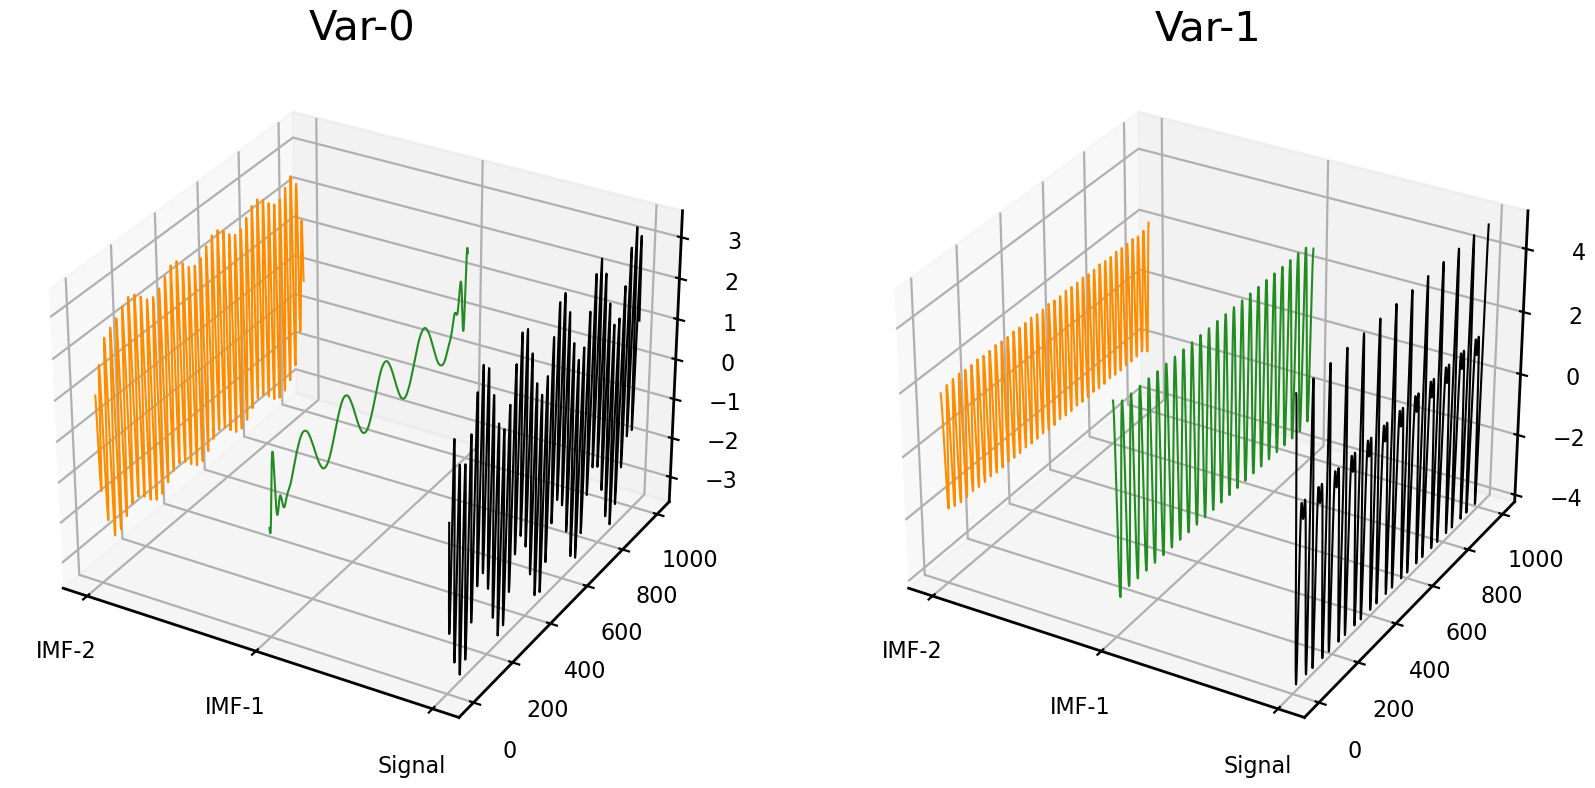

In [10]:
# Adjust the visualization via the `view` variable
plot_IMFs(signal, IMFs, view='3d')